# Paschal Uzoegwu (21063051).
## Applied Data Science Assignment.

## Setting up the environment.
### Importing the needed libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Ready To Code')

Ready To Code


# Steps

##  1.Reading the .csv file.

#### Printing the first five rows

In [2]:
"""
Reading Happy_income.csv data with pandas Dataframe

"""
happy_income_data  = pd.read_csv('Happy_income.csv')


#Printing the first five rows.

happy_income_data .head()


,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


## Descriptive Statistics.

In [3]:
"""
Overview of data types and missing values to get a clear understanding of the data set and its data type.

"""
print(happy_income_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB
None


In [4]:
"""
Summarizing the statistical variables of happy_income_data. 

"""

print(happy_income_data.describe())

       adjusted_satisfaction  avg_satisfaction  std_satisfaction  \
count             111.000000        111.000000        111.000000   
mean               48.729730          5.936937          2.124595   
std                12.364131          1.356394          0.316546   
min                19.000000          2.500000          1.380000   
25%                40.000000          5.100000          1.910000   
50%                48.000000          6.000000          2.130000   
75%                57.000000          7.000000          2.330000   
max                74.000000          8.500000          3.190000   

         avg_income  median_income  income_inequality  happyScore         GDP  
count    111.000000     111.000000         111.000000  111.000000  111.000000  
mean    6442.751416    5186.005304          38.417805    5.421910    0.841909  
std     6479.533692    5587.037239           8.375557    1.180801    0.387591  
min      572.880000     415.480000          24.215000    2.839000  

##  Analysis & Visualisation.

#### Using scatter plot.

In [5]:
"""
A scatter plot showing potential relationships between happiness scores(Happy Score) and GDP

"""
#Defining a function to plot scatter plot
def plot_happyScore_vs_GDP(data):
    
    
    plt.figure(figsize=(8, 6))
    
    # Using seaborn to create a scatter plot
    ax = sns.scatterplot(x='GDP', y='happyScore', data=data, hue='region', palette='Set2')
    
    # Adding a grid to the plot
    ax.grid(color='lightgray', zorder=0)
    
    # Labeling x-axis
    plt.title('Happy Score vs GDP')
    
    # Labeling y-axis
    plt.xlabel('GDP (Gross Domestic Product)')
    
    # Adding title to the plot
    plt.ylabel('Happy Score')
    
    plt.show()

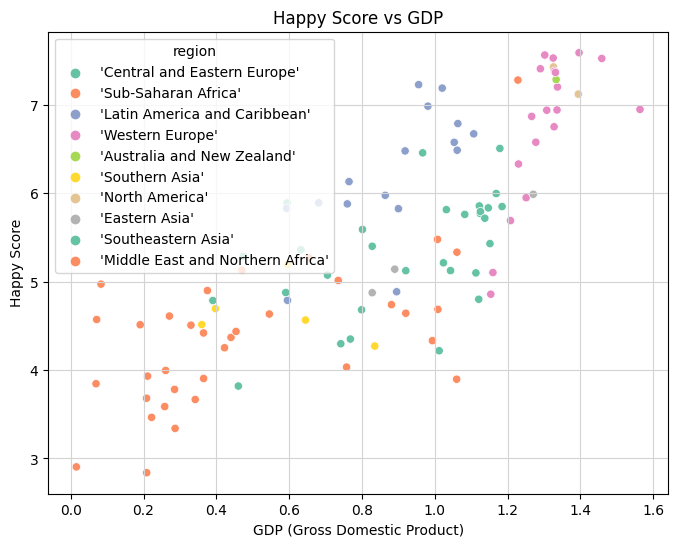

In [6]:
"""
Calling the plot scatter function with happy_income_data

"""

plot_happyScore_vs_GDP(happy_income_data)

In [7]:

"""
A scatter plot showing potential relationships between happiness scores (Happy Score) and average income

"""
#Defining the function to plot scatter plot
    
def plot_happyScore_vs_avg_income(data):
    
    # Using seaborn to create a scatter plot
    ax = sns.scatterplot(x=data['avg_income'], y=data['happyScore'])
    
    # Adding a grid to the plot
    ax.grid(color='lightgray', zorder=0)
    
    # Labeling x-axis
    plt.xlabel('Average Income')
    
    # Labeling y-axis
    plt.ylabel('Happy Score')
    
    # Adding title to the plot
    plt.title('Average Income vs Happiness Score')
    
   
    plt.show()


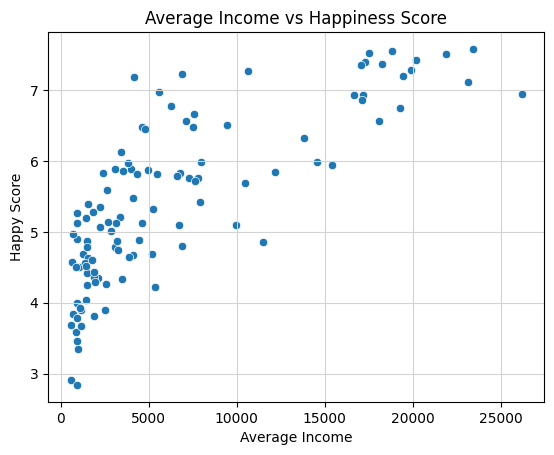

In [8]:
"""
Calling the plot scatter function with happy_income_data

"""
plot_happyScore_vs_avg_income(happy_income_data)

#### Finding the correlation.

In [9]:
"""
Finding the correlation between average income and happiness score 

"""



correlation = happy_income_data['avg_income'].corr(happy_income_data['happyScore'])

print('correlation =',correlation)

correlation = 0.7821219032040564


#### Using bar plot.

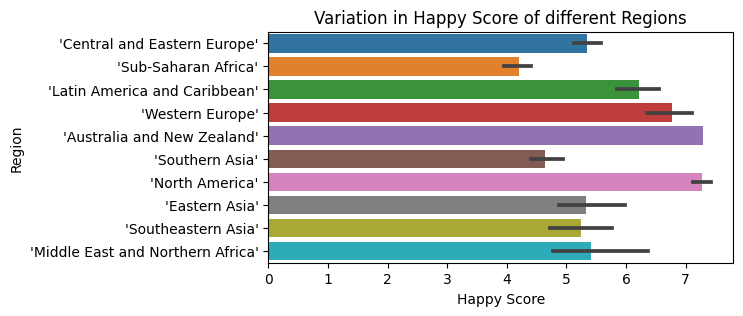

In [10]:
"""
Observing the variation in Happy Score of different Regions

"""

plt.figure(figsize=(6,3))

#Creating a bar plot. The x parameter specifies the values to be plotted on the x-axis, which are the Happy Scores (happyScore) from the DataFrame,Whereas The y parameter specifies the categorical variable for the regions. 

sns.barplot(x=happy_income_data['happyScore'],y=happy_income_data['region'])

 # Adding title to the barplot
plt.title('Variation in Happy Score of different Regions')

# Labeling x-axis(x parameter)
plt.xlabel('Happy Score')

# Labeling y-axis(y parameter)
plt.ylabel('Region')


plt.show()

In [11]:
def plot_top_countries_by_variable(data, variable, n_top, plot_title):
    """
    Observing the variation in GDP of the top 20 countries

    """
    plt.figure(figsize=(10, 8))  # Set the figure size

    # Sort the data by the specified variable in descending order and select the top N countries
    top_n_countries = data.nlargest(n_top, variable)

    # Create a bar plot of the specified variable vs Country for the top N countries
    sns.barplot(x=variable, y='country', data=top_n_countries)
    
    # Adding title to the barplot
    plt.title(plot_title)
    
    # Labeling x-axis
    plt.xlabel(variable)
    
    # Labeling y-axis
    plt.ylabel('Country')

    plt.show()


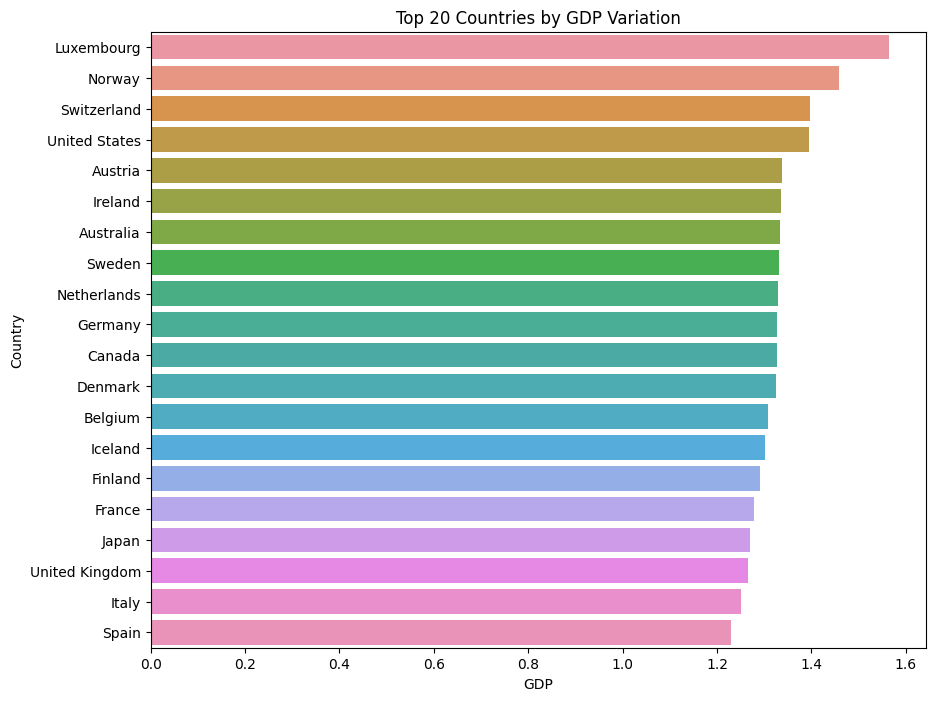

In [12]:
"""
Showing the plot of the top 20 countries

"""


plot_top_countries_by_variable(happy_income_data, 'GDP', 20, 'Top 20 Countries by GDP Variation')



#### Using Heat map

In [13]:

"""
Heatmap of Correlation 

"""
def plot_heatmap(data):
    # Calculate the correlation matrix
    corr_happy_income_data = data.corr()
    
    # Creating a heatmap using the seaborn function
    sns.heatmap( corr_happy_income_data, annot=True, cmap='coolwarm', fmt=".2f")
    
    # Adding title to the plot
    plt.title('Heatmap of Correlation')
    
    
    plt.show()


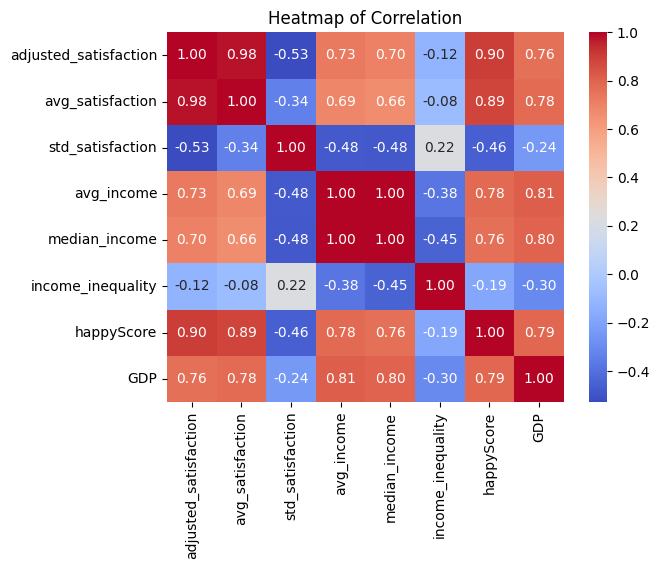

In [14]:
"""
Calling  the function to display heatmap with your data

"""

plot_heatmap(happy_income_data)